<a href="https://colab.research.google.com/github/BrendanD2/RelevantProjects/blob/main/Copy_of_ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/jldbc/pybaseball repository used for gathering player statistics

In [1]:
pip install pybaseball

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [2]:
from pybaseball import batting_stats
import pandas as pd

# This is where you can pick the year. We chose 2017 and 2018.
# You can run a 2 year regression as well, chosing 2017 and 2019
# if you wanted to look further into the future.

data = batting_stats('2017')[['Name', 'Age', 'G', 'AB', 'PA', 'H', '1B', '2B', '3B', 'HR', 'R', 'RBI', 'BB']]
data2 = batting_stats('2018')

# There are multiple different options here. You can run a model against any variable.
# Examples:
#
# This will run a regression based on their hits next season
# data3 = data2['H']
# This will run a regression based on their runs next season
data3 = data2['R']

data4 = data2['Name']
data5= {'regVar':data3,'Name':data4}
data5 = pd.DataFrame(data5)
df = pd.merge(data, data5, on='Name', how='inner').drop(['Name'], axis=1)

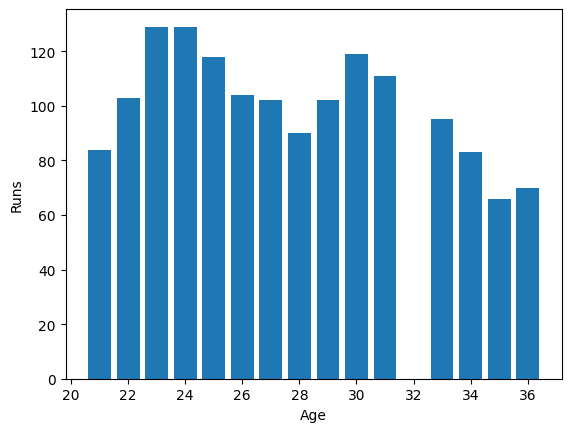

In [3]:
import matplotlib.pyplot as plt

plt.bar(df['Age'], df['regVar'])
plt.xlabel('Age')
plt.ylabel('Runs')
plt.show()

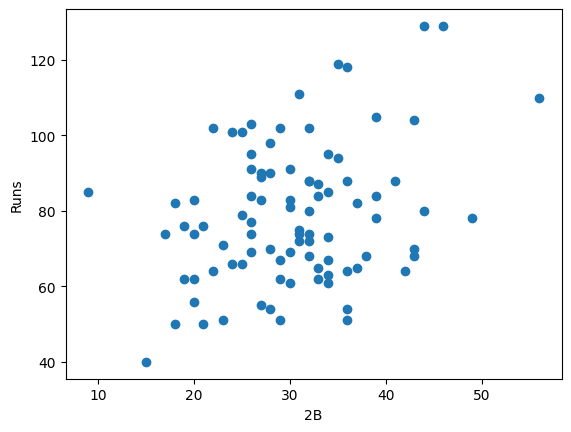

In [4]:
plt.scatter(df['2B'], df['regVar'])
plt.xlabel('2B')
plt.ylabel('Runs')
plt.show()

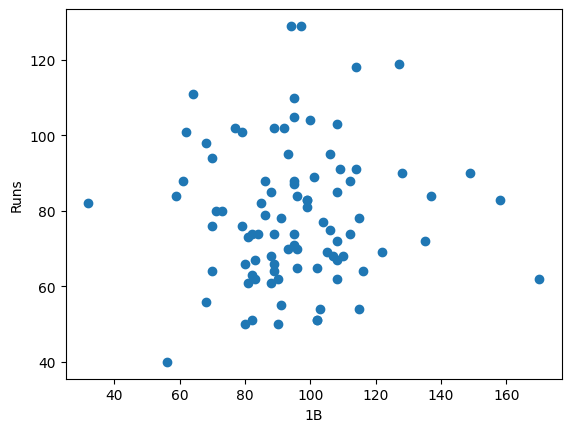

In [5]:
plt.scatter(df['1B'], df['regVar'])
plt.xlabel('1B')
plt.ylabel('Runs')
plt.show()

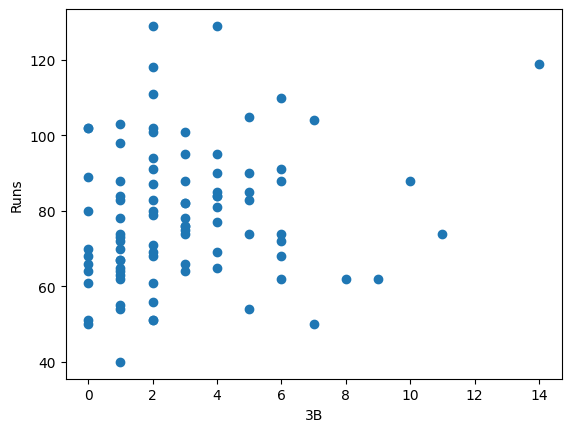

In [6]:
plt.scatter(df['3B'], df['regVar'])
plt.xlabel('3B')
plt.ylabel('Runs')
plt.show()

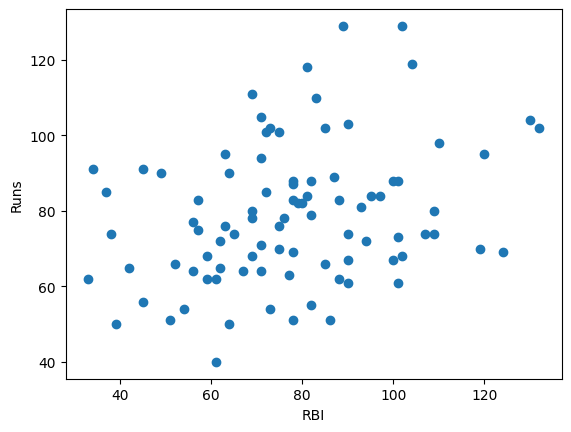

In [7]:
plt.scatter(df['RBI'], df['regVar'])
plt.xlabel('RBI')
plt.ylabel('Runs')
plt.show()

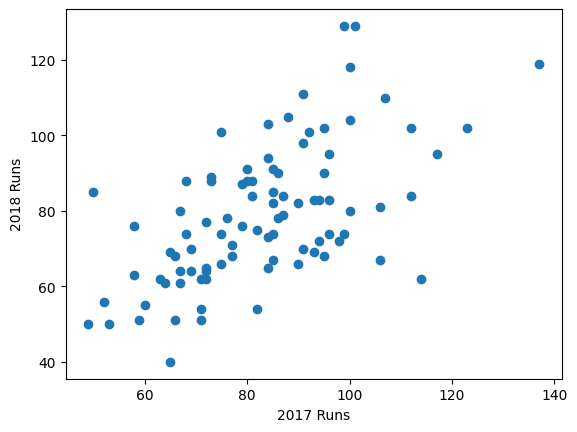

In [8]:
plt.scatter(df['R'], df['regVar'])
plt.xlabel('2017 Runs')
plt.ylabel('2018 Runs')
plt.show()

In [9]:
X = df.drop(['regVar'], axis = 1)
y = pd.DataFrame(df['regVar'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
X_train

,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB
67,30,144,518,570,131,82,34,1,14,58,77,42
31,27,162,603,671,192,135,31,1,25,98,94,66
75,29,155,569,654,139,95,23,2,19,77,71,71
9,27,147,508,605,153,86,41,1,25,81,100,84
68,26,139,582,633,144,112,17,11,4,85,38,44
...,...,...,...,...,...,...,...,...,...,...,...,...
20,28,134,455,515,138,81,34,0,23,67,90,49
60,33,139,529,564,158,96,43,1,18,69,75,22
71,25,157,614,665,167,95,36,10,26,73,101,41
14,27,158,589,647,164,110,38,2,14,77,69,47


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), ElasticNet(alpha=0.01, l1_ratio=0.3))
pipeline.fit(X_train, y_train['regVar'])
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'R2 test: {r2_score_test:.3f}')
print(f'MSE train: {MSE_train:.3f}, MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f}, MAE test:{MAE_test:.3f}')

Intercept (b) 77.825397
Age    -5.696197
G      -4.666502
AB     -3.625520
PA      6.223591
H      -0.776016
1B     -1.373267
2B      2.942634
3B      0.595805
HR     -1.309316
R      10.645580
RBI     2.508201
BB     -1.209273
dtype: float64 

R2 train: 0.573
R2 test: 0.435
MSE train: 124.045, MSE test:232.010
MAE train: 8.569, MAE test:12.740


In [13]:
from sklearn.linear_model import LinearRegression,ElasticNet,LassoCV,RidgeCV
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'R2 test: {r2_score_test:.3f}')
print(f'MAE = {mean_absolute_error(y_pred,y_test):.3f}')
MSE= mean_squared_error(y_pred,y_test)
print(f'MSE = {MSE:.3f}')
print(f'RMSE= {np.sqrt(MSE):.3f}')

R2 train: 0.577
R2 test: 0.435
MAE = 12.458
MSE = 225.084
RMSE= 15.003


In [14]:
alphas = np.geomspace(1e-10, 1e10, num=21)
pipeline = make_pipeline(StandardScaler(), LassoCV(alphas=alphas))
pipeline.fit(X_train, y_train['regVar'])
print(f'Chosen alpha  {pipeline.steps[1][1].alpha_:.6f}')
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'R2 test: {r2_score_test:.3f}')
print(f'MSE train: {MSE_train:.3f}, MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f}, MAE test:{MAE_test:.3f}')

Chosen alpha  1.000000
Intercept (b) 77.825397
Age   -4.670097
G     -1.615435
AB    -0.000000
PA     0.000000
H     -0.000000
1B    -0.055221
2B     1.999226
3B     0.000000
HR     0.000000
R      9.743317
RBI    1.099380
BB     0.000000
dtype: float64 

R2 train: 0.541
R2 test: 0.389
MSE train: 133.372, MSE test:250.975
MAE train: 9.155, MAE test:13.011


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.073160973483937, tolerance: 1.631832
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.74198608019833, tolerance: 1.631832
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.50684877211825, tolerance: 1.631832
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not co

In [15]:
alphas = np.geomspace(1e-10, 1e10, num=100)
pipeline = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas))
pipeline.fit(X_train, y_train['regVar'])
print(f'Chosen alpha  {pipeline.steps[1][1].alpha_:.6f}')
print(f'Intercept (b) {pipeline.steps[1][1].intercept_:.6f}')
print(pd.Series(pipeline.steps[1][1].coef_, index=X.columns),'\n')
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'R2 test: {r2_score_test:.3f}')
print(f'MSE train: {MSE_train:.3f}, MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f}, MAE test:{MAE_test:.3f}')

Chosen alpha  20.565123
Intercept (b) 77.825397
Age   -4.027652
G     -2.428085
AB     0.019197
PA     1.032074
H      1.306022
1B    -0.538451
2B     2.145702
3B     1.690721
HR     1.703217
R      5.455766
RBI    1.069286
BB     1.660112
dtype: float64 

R2 train: 0.530
R2 test: 0.329
MSE train: 136.504, MSE test:275.504
MAE train: 9.283, MAE test:13.663


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train['regVar'])
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
print(f'R2 train: {r2_score_train:.3f}')
print(f'R2 test: {r2_score_test:.3f}')
print(f'MSE train: {MSE_train:.3f}, MSE test:{MSE_test:.3f}')
print(f'MAE train: {MAE_train:.3f}, MAE test:{MAE_test:.3f}')

R2 train: 0.788
R2 test: -0.104
MSE train: 61.492, MSE test:453.481
MAE train: 3.365, MAE test:16.519
